<a href="https://colab.research.google.com/github/marcmacias96/PythonMachineLearning/blob/master/CelciustoFahrenheitLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#ahora importamos la libreria Sklearn para instaciar nuestra regresion lineal model
from sklearn.linear_model import LinearRegression

In [ ]:

# Esta seccion de codigo es para obtener nuesto deataset de google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1KEQCysbOLUCBgdfrzml1RGm--7gzjLBW/view?usp=sharing'
id = '1KEQCysbOLUCBgdfrzml1RGm--7gzjLBW'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
dataset = pd.read_csv('celsius_a_fahrenheit.csv')

In [ ]:
dataset.head()

,Celsius,Fahrenheit
0,-108,NaN
1,-80,NaN
2,-52,NaN
3,-24,NaN
4,-10,14.0


In [160]:
#verificamos que no existan datos incorrectos y si hay los corregimos
index = 0
for test in dataset.Celsius :
  correct = test*1.8 + 32
  if correct != dataset.Fahrenheit.get(index):
    print(f'correcto: {correct}, actual: {dataset.Fahrenheit.get(index)}')
    dataset.Fahrenheit[index] = correct
    print(f'ahora: {dataset.Fahrenheit.get(index)}')
  index+=1

correcto: -162.4, actual: nan
ahora: -162.4
correcto: -112.0, actual: nan
ahora: -112.0
correcto: -61.60000000000001, actual: nan
ahora: -61.60000000000001
correcto: -11.200000000000003, actual: nan
ahora: -11.200000000000003
correcto: 50.0, actual: 5.0
ahora: 50.0
correcto: 140.0, actual: 14.0
ahora: 140.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


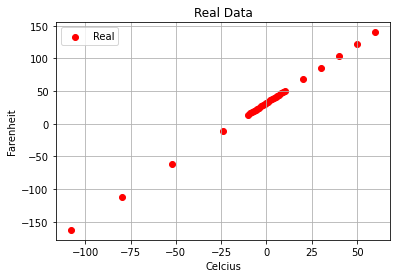

In [161]:
#Graficamos la data real
plt.scatter(dataset.Celsius,dataset.Fahrenheit, c='red', label='Real')
plt.xlabel('Celcius')
plt.ylabel('Farenheit')
plt.legend()
plt.grid(True)
plt.title('Real Data')
plt.show()


In [ ]:
#tranformamos los datos a conveniencia del algoritmo de 1D a 2D
celarray = np.array(dataset.Celsius)
fararray = np.array(dataset.Fahrenheit)
celarray= np.reshape(celarray,(-1,1))
fararray = np.reshape(fararray,(-1,1))

In [ ]:
#Creamos nuestra instancia de LienarRegresion de Sklear y le damos nuestro dataset como nuestro conjunto de entrenamiento
LR = LinearRegression()
LR.fit(celarray,fararray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#hacemos un conjunto de datos de prueba (Vamos a meter los datos que no existian en el dataset)

celcius_test = np.reshape([-74,-23,-80,-91],(-1,1))
farenheit_predict = LR.predict(celcius_test)

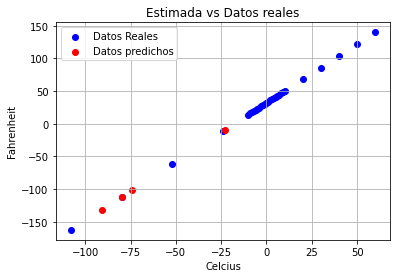

In [162]:
#Graficamos nuestros datos con los datos de prueba 
plt.scatter(dataset.Celsius,dataset.Fahrenheit, c='blue', label='Datos Reales')
plt.scatter(celcius_test, farenheit_predict, c='red', label='Datos predichos')
plt.xlabel('Celcius')
plt.ylabel('Fahrenheit')
plt.legend()
plt.grid(True)
plt.title('Estimada vs Datos reales')
plt.show()

In [ ]:
#Como la relación entre Celsius y Fahrenheit es una ecuación lineal de primer orden, nuestro modelo predice la precisión %100. Vamos a comprobarlo:
a=LR.coef_
b=LR.predict([[0]])
print(f'a: {a}, b: {b}')

a: [[1.8]], b: [[32.]]


In [ ]:
x_range = np.arange(-75,100)
f = x_range*1.8 + 32

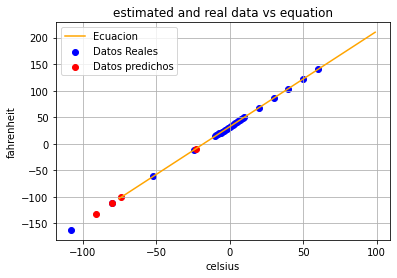

In [163]:
plt.plot(x_range,f,c='orange', label='Ecuacion')
plt.scatter(dataset.Celsius,dataset.Fahrenheit, c='blue', label='Datos Reales')
plt.scatter(celcius_test, farenheit_predict, c='red', label='Datos predichos')
plt.xlabel('celsius')
plt.ylabel('fahrenheit')
plt.legend()
plt.grid(True)
plt.title('estimated and real data vs equation')
plt.show()

In [ ]:

acc_train = LR.score(celarray,fararray)
print('Pesicion de entrenamiento:',acc_train)

Pesicion de entrenamiento: 1.0


In [ ]:
acc_test = LR.score(celcius_test,farenheit_predict)
print(f'Presicion de prediccion', acc_test)
print(f'Grados centigrados: {celcius_test}')
print(f'Grados farengeigth: {farenheit_predict}')

Presicion de prediccion 1.0
Grados centigrados: [[-74]
 [-23]
 [-80]
 [-91]]
Grados farengeigth: [[-101.2]
 [  -9.4]
 [-112. ]
 [-131.8]]
